In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Simulate features: Thumb, Index, Middle, Ring, Pinky (finger angles)
np.random.seed(42)
n_samples = 30

# Peace Gesture (✌️)
peace = pd.DataFrame({
    'Thumb': np.random.normal(30, 5, n_samples),
    'Index': np.random.normal(90, 5, n_samples),
    'Middle': np.random.normal(90, 5, n_samples),
    'Ring': np.random.normal(10, 3, n_samples),
    'Pinky': np.random.normal(10, 3, n_samples),
    'Label': 'Peace'
})

# Thumbs Up (👍)
thumbs_up = pd.DataFrame({
    'Thumb': np.random.normal(90, 5, n_samples),
    'Index': np.random.normal(10, 3, n_samples),
    'Middle': np.random.normal(10, 3, n_samples),
    'Ring': np.random.normal(10, 3, n_samples),
    'Pinky': np.random.normal(10, 3, n_samples),
    'Label': 'Thumbs Up'
})

# Stop (✋)
stop = pd.DataFrame({
    'Thumb': np.random.normal(90, 5, n_samples),
    'Index': np.random.normal(90, 5, n_samples),
    'Middle': np.random.normal(90, 5, n_samples),
    'Ring': np.random.normal(90, 5, n_samples),
    'Pinky': np.random.normal(90, 5, n_samples),
    'Label': 'Stop'
})

# Combine all data
df = pd.concat([peace, thumbs_up, stop], ignore_index=True)
df.head()


,Thumb,Index,Middle,Ring,Pinky,Label
0,32.483571,86.991467,87.604129,10.291233,12.373096,Peace
1,29.308678,99.261391,89.071705,12.905935,7.271838,Peace
2,33.238443,89.932514,84.468325,7.893841,14.208383,Peace
3,37.615149,84.711445,84.018967,9.017014,5.794447,Peace
4,28.829233,94.112725,94.062629,8.823676,11.760571,Peace


In [3]:
X = df[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [4]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [5]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       Peace       1.00      1.00      1.00         4
        Stop       1.00      1.00      1.00         9
   Thumbs Up       1.00      1.00      1.00        14

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



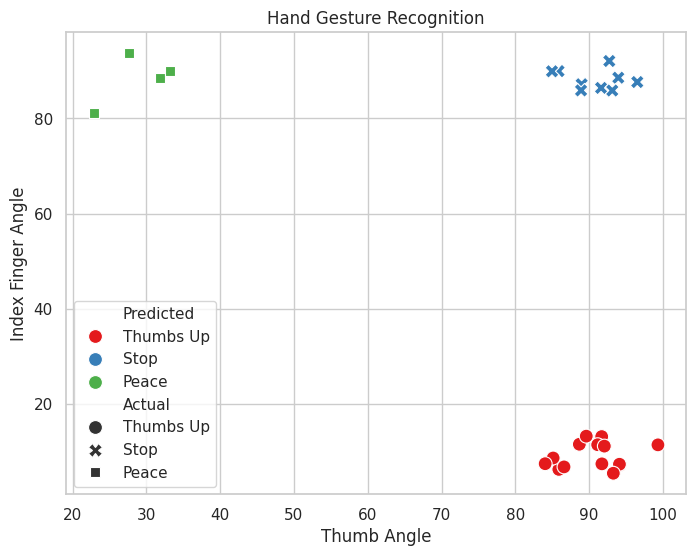

In [6]:
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_test, x='Thumb', y='Index', hue='Predicted', style='Actual', palette='Set1', s=100)
plt.title("Hand Gesture Recognition")
plt.xlabel("Thumb Angle")
plt.ylabel("Index Finger Angle")
plt.grid(True)
plt.show()
